In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

In [2]:
df = pd.read_csv("../../datasets/clust.csv")
df.head()

,ID,Distance,Speed
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


# 1. KMeans Clustering

In [3]:
model = KMeans(n_clusters=6, # Number of clusters | By default 8 clusters
               n_init=5, # Number of times algo will run with different centroid seeds for max_iter number of iterations. 
                       # Final output will be the best output among all runs
               max_iter=200) 

model.fit(df.iloc[:,[1,2]])
pred = model.predict(df.iloc[:,[1,2]])

centroids = model.cluster_centers_
centroids

array([[ 50.61421836,  33.06203474],
       [196.97338462,  11.20615385],
       [166.25071809,  10.39361702],
       [176.63676768,  71.53535354],
       [ 57.76133288,   5.2836637 ],
       [ 41.41684408,   5.3958021 ]])

Text(0,0.5,'Speed')

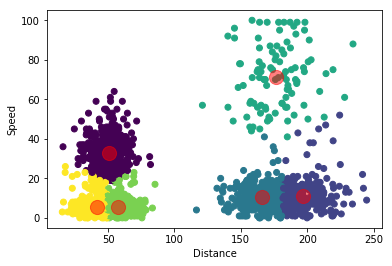

In [4]:
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=pred, cmap='viridis')         # for original data points
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5); # for centroids
plt.xlabel("Distance"); plt.ylabel("Speed")

### Evaluating our model using Silhouette score [-1,1]
-1: incorrect clustering  
+1: correct clustering

In [5]:
metrics.silhouette_score(df.iloc[:,[1,2]], model.labels_) # Moderate

0.48568281285704906

# 2. Mini Batch KMeans Clustering
Built on the foundations of KMeans, it uses mini batches to reduce the computation time.  
Trade-off with time is that the result may be little incorrect.

0.48758775168746604

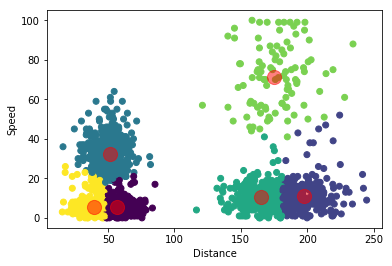

In [6]:
model = MiniBatchKMeans(n_clusters=6) 

model.fit(df.iloc[:,[1,2]])
pred = model.predict(df.iloc[:,[1,2]])

centroids = model.cluster_centers_
plt.scatter(df.iloc[:, 1], df.iloc[:, 2], c=pred, cmap='viridis')         # for original data points
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5); # for centroids
plt.xlabel("Distance"); plt.ylabel("Speed")
metrics.silhouette_score(df.iloc[:,[1,2]], model.labels_) # Moderate

# 3. Hierarchical clustering
It builds nested clusters by merging or splitting them successively.   

## Agglomerative Clustering
It performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together.  
Linkage:  
*ward* minimizes the variance of the clusters being merged. (by default)  
*average* uses the average of the distances of each observation of the two sets.  
*complete* or *maximum* linkage uses the maximum distances between all observations of the two sets.

In [7]:
model = AgglomerativeClustering(n_clusters=6, linkage='complete') 

model.fit(df.iloc[:,[1,2]])

metrics.silhouette_score(df.iloc[:,[1,2]], model.labels_) # High

0.7507243194804587

In [8]:
# Function to plot dendograms
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

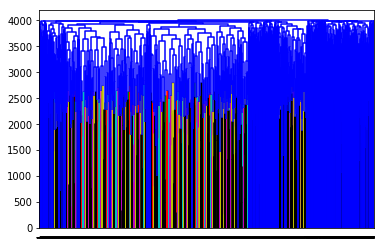

In [9]:
plot_dendrogram(model, labels=model.labels_)

# 4. Density Based Scan
The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.  
A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).   
  
Higher $min$_$samples$ or lower $eps$ indicate higher density necessary to form a cluster.

In [10]:
model = DBSCAN(eps=1, # The maximum distance between two samples for them to be considered as in the same neighborhood.
               min_samples=2) # The number of samples in a neighborhood for a point to be considered as a core point.

model.fit(df.iloc[:,[1,2]])
metrics.silhouette_score(df.iloc[:,[1,2]], model.labels_) # This score isn't preferred for DBSCAN

-0.42858016783860414